In [0]:
%pip install autokeras

Python interpreter will be restarted.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-6f63d61c-38a1-46cb-9bde-bbac0b5c7990
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.5
    Not uninstalling protobuf at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-6f63d61c-38a1-46cb-9bde-bbac0b5c7990
    Can't uninstall 'protobuf'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
%pip install Pillow

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# create a virtual environment and install autokeras, matplotlib, pyarrow
# do not install keras or tensorflow one of them creates dependency issues

# Necessary imports
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import pathlib
import pandas as pd
import math

import io
import requests
from PIL import Image

# check on housing data
# prices in logscale
# mirror images 

In [0]:
# Download the csv from github of anais
#art = pd.read_csv('cleaned_prices.csv')
#art = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
#art_spk = spark.createDataFrame(art)
art_spk = spark.sql("select * from artworks_with_prices")
art_clean_ids = spark.sql("select * from clean_art_ids_new")
clean_ids = art_clean_ids.rdd.map(lambda x: x[0]).collect()

In [0]:
art_spk.count()

Out[48]: 10517

In [0]:
from pyspark.sql.functions import col
art_clean = art_spk
art_clean = art_clean.filter(col("id").isin(clean_ids))
display(art_clean)

id name url image_url artist rating summary year medium location name_english artist_name price price_name 0 Cafe Terrace on the Place du Forum http://wikigallery.org/wiki/painting_133032/Vincent-Van-Gogh/Cafe-Terrace-on-the-Place-du-Forum https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/Cafe+Terrace+on+the+Place+du+Forum.jpg 0 8.0 Café Terrace at Night is an 1888 oil painting by the Dutch artist Vincent van Gogh. It is also known as The Cafe Terrace on the Place du Forum, and, when first exhibited in 1891, was entitled Coffeehouse, in the evening (Café, le soir).
Van Gogh painted Café Terrace at Night in Arles, France, in mid-September 1888. The painting is not signed, but described and mentioned by the artist in three letters.Visitors to the site can stand at the north eastern corner of the Place du Forum, where the artist set up his easel. The site was refurbished in 1990 and 1991 to replicate van Gogh's painting. He looked south towards the artificially lit terrace of the popular coffee house, as well as into the enforced darkness of the rue du Palais which led up to a building structure (to the left, not pictured) and, beyond this structure, the tower of a former church which is now Musée Lapidaire.
Towards the right, Van Gogh indicated a lighted shop and some branches of the trees surrounding the place, but he omitted the remainders of the Roman monuments just beside this little shop.
The painting is currently at the Kröller-Müller Museum in Otterlo, Netherlands. 1888.0 0.0 Kröller-Müller Museum Cafe Terrace on the Place du Forum Vincent Van Gogh 5523624.75 average price of artist 1 Starry Night http://wikigallery.org/wiki/painting_9698/Vincent-Van-Gogh/Starry-Night https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/Starry+Night.jpg 0 9.0 null null null null Starry Night Vincent Van Gogh 5523624.75 average price of artist 2 A Digger http://wikigallery.org/wiki/painting_132953/Vincent-Van-Gogh/A-Digger https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Digger.jpg 0 7.0 null null null null A Digger Vincent Van Gogh 5523624.75 average price of artist 3 A Group of Cottages http://wikigallery.org/wiki/painting_132642/Vincent-Van-Gogh/A-Group-of-Cottages https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Group+of+Cottages.jpg 0 6.0 Stoneywell is a National Trust property in Ulverscroft, a dispersed settlement near Coalville in Charnwood Forest, Leicestershire. Stoneywell is the largest of a small group of cottages designed in the Arts and Crafts style by Ernest Gimson. It was built in collaboration with Detmar Blow in 1899 for Ernest's brother Sydney Gimson as a summer residence, and along with much original furniture, it remained in the Gimson family for over a century. As part of a highly influential vernacular movement, it has become well known within Arts and Crafts circles. In spring 2013 the National Trust announced that following a year-long appeal, it had been able to acquire the house with its Arts and Crafts contents, gardens and woodland. It was opened to the public in February 2015. null null null A Group of Cottages Vincent Van Gogh 18500.0 van - Thatched Cottages at Cordeville 4 A Pair of Shoes http://wikigallery.org/wiki/painting_94630/Vincent-Van-Gogh/A-Pair-of-Shoes https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Pair+of+Shoes.jpg 0 8.0 Toms (stylized as TOMS) is a for-profit company based in Los Angeles, California. Founded in 2006 by Blake Mycoskie, an entrepreneur from Arlington, Texas, the company designs and markets shoes as well as eyewear, coffee, apparel and handbags.
The company was taken over by its creditors: Jefferies Financial Group Inc, Nexus Capital Management LP, and Brookfield Asset Management Inc in December 2019, and founder Mycoskie ceased to be an owner. null null null A Pair of Shoes Vincent Van Gogh 1.0E7 A PA

In [0]:
art_clean.count()

Out[50]: 8219

In [0]:
import pyspark.sql.functions as f
art_clean = art_clean.withColumn('price',f.log(art_clean['price']))
display(art_clean)

id name url image_url artist rating summary year medium location name_english artist_name price price_name 0 Cafe Terrace on the Place du Forum http://wikigallery.org/wiki/painting_133032/Vincent-Van-Gogh/Cafe-Terrace-on-the-Place-du-Forum https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/Cafe+Terrace+on+the+Place+du+Forum.jpg 0 8.0 Café Terrace at Night is an 1888 oil painting by the Dutch artist Vincent van Gogh. It is also known as The Cafe Terrace on the Place du Forum, and, when first exhibited in 1891, was entitled Coffeehouse, in the evening (Café, le soir).
Van Gogh painted Café Terrace at Night in Arles, France, in mid-September 1888. The painting is not signed, but described and mentioned by the artist in three letters.Visitors to the site can stand at the north eastern corner of the Place du Forum, where the artist set up his easel. The site was refurbished in 1990 and 1991 to replicate van Gogh's painting. He looked south towards the artificially lit terrace of the popular coffee house, as well as into the enforced darkness of the rue du Palais which led up to a building structure (to the left, not pictured) and, beyond this structure, the tower of a former church which is now Musée Lapidaire.
Towards the right, Van Gogh indicated a lighted shop and some branches of the trees surrounding the place, but he omitted the remainders of the Roman monuments just beside this little shop.
The painting is currently at the Kröller-Müller Museum in Otterlo, Netherlands. 1888.0 0.0 Kröller-Müller Museum Cafe Terrace on the Place du Forum Vincent Van Gogh 15.524544860356704 average price of artist 1 Starry Night http://wikigallery.org/wiki/painting_9698/Vincent-Van-Gogh/Starry-Night https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/Starry+Night.jpg 0 9.0 null null null null Starry Night Vincent Van Gogh 15.524544860356704 average price of artist 2 A Digger http://wikigallery.org/wiki/painting_132953/Vincent-Van-Gogh/A-Digger https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Digger.jpg 0 7.0 null null null null A Digger Vincent Van Gogh 15.524544860356704 average price of artist 3 A Group of Cottages http://wikigallery.org/wiki/painting_132642/Vincent-Van-Gogh/A-Group-of-Cottages https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Group+of+Cottages.jpg 0 6.0 Stoneywell is a National Trust property in Ulverscroft, a dispersed settlement near Coalville in Charnwood Forest, Leicestershire. Stoneywell is the largest of a small group of cottages designed in the Arts and Crafts style by Ernest Gimson. It was built in collaboration with Detmar Blow in 1899 for Ernest's brother Sydney Gimson as a summer residence, and along with much original furniture, it remained in the Gimson family for over a century. As part of a highly influential vernacular movement, it has become well known within Arts and Crafts circles. In spring 2013 the National Trust announced that following a year-long appeal, it had been able to acquire the house with its Arts and Crafts contents, gardens and woodland. It was opened to the public in February 2015. null null null A Group of Cottages Vincent Van Gogh 9.825526011066415 van - Thatched Cottages at Cordeville 4 A Pair of Shoes http://wikigallery.org/wiki/painting_94630/Vincent-Van-Gogh/A-Pair-of-Shoes https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/A+Pair+of+Shoes.jpg 0 8.0 Toms (stylized as TOMS) is a for-profit company based in Los Angeles, California. Founded in 2006 by Blake Mycoskie, an entrepreneur from Arlington, Texas, the company designs and markets shoes as well as eyewear, coffee, apparel and handbags.
The company was taken over by its creditors: Jefferies Financial Group Inc, Nexus Capital Management LP, and Brookfield Asset Management Inc in December 2019, and founder Mycoskie ceased to be an owner. null null null A Pair of

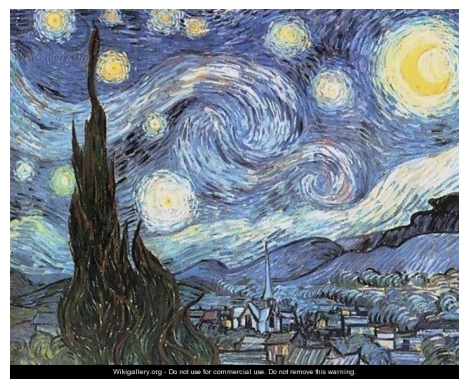

5213


In [0]:
def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
display_artwork(art.image_url.values[0])
print(art.price.size)

In [0]:
tr_size = round(0.7*8219)
val_size = round(0.2*8219)
ts_size = round(0.1*8219)
ts_size

Out[63]: 822

In [0]:
# Collect all data
art = art_clean.toPandas()

# Convolutional neural network (CNN) needs same shapes as input, so add zero padding untill max size of all images
new_width = 660
new_height = 660

# Resize images to make it computationally less heavy, might be removed in final regressor
img_size = 64

# Number of images loaded to train regressor, note some images will be removed because they do not have ratings
tot_im = 6322


def get_train_data(label, start_id, end_id):
    x_data = [] 
    y_data = []
    url = label.image_url
    for i in range(start_id,end_id):#label.id:
        try:
            response = requests.get(url[i])
            image = Image.open(io.BytesIO(response.content))
                       
            # Cropping
            size = min(image.size)  -40     # New dimension
            width, height = image.size   # Get dimensions

            left = (width   - size)/2
            top = (height   - size)/2
            right = (width  + size)/2
            bottom = (height+ size)/2

            # Crop the center of the image
            result = image.crop((left, top, right, bottom))
            result = result.resize((img_size, img_size))
            
            if ((np.asarray(result).shape == (img_size,img_size,3))
                and (not math.isnan(label.price[i]))):
                x_data.append(np.asarray(result))
                y_data.append(label.price[i])
                
        except Exception as e:
            print(e)
    return (x_data, y_data)


In [0]:
art.image_url.values[1]

Out[68]: 'https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/images/Vincent+Van+Gogh/Starry+Night.jpg'

In [0]:
def adjust_img(url):
  ## for i in artworks, adjust accordingly and save 
            response = requests.get(url)
            image = Image.open(io.BytesIO(response.content))
                       
            # Cropping
            size = min(image.size)  -40     # New dimension
            width, height = image.size   # Get dimensions

            left = (width   - size)/2
            top = (height   - size)/2
            right = (width  + size)/2
            bottom = (height+ size)/2

            # Crop the center of the image
            result = image.crop((left, top, right, bottom))
            result = result.resize((img_size, img_size))
            return result

In [0]:
art_2 = art
art_2.head()

id 
 name 
 url 
 image_url 
 artist 
 rating 
 summary 
 year 
 medium 
 location 
 name_english 
 artist_name 
 price 
 price_name 
 
 
 
 
 0 
 0 
 Cafe Terrace on the Place du Forum 
 http://wikigallery.org/wiki/painting_133032/Vi... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 8.0 
 Café Terrace at Night is an 1888 oil painting ... 
 1888.0 
 0.0 
 Kröller-Müller Museum 
 Cafe Terrace on the Place du Forum 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 
 
 1 
 1 
 Starry Night 
 http://wikigallery.org/wiki/painting_9698/Vinc... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 9.0 
 None 
 NaN 
 NaN 
 None 
 Starry Night 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 
 
 2 
 2 
 A Digger 
 http://wikigallery.org/wiki/painting_132953/Vi... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 7.0 
 None 
 NaN 
 NaN 
 None 
 A Digger 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 
 
 3 
 3 
 A Group of Cottages 
 http://wikigallery.org/wiki/painting_132642/Vi... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 6.0 
 Stoneywell is a National Trust property in Ulv... 
 NaN 
 NaN 
 None 
 A Group of Cottages 
 Vincent Van Gogh 
 9.825526 
 van - Thatched Cottages at Cordeville 
 
 
 4 
 4 
 A Pair of Shoes 
 http://wikigallery.org/wiki/painting_94630/Vin... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 8.0 
 Toms (stylized as TOMS) is a for-profit compan... 
 NaN 
 NaN 
 None 
 A Pair of Shoes 
 Vincent Van Gogh 
 16.118096 
 A PAIR OF SHOES

In [0]:
def process_images(val):
  url_test = art.image_url.values[val]
  res = adjust_img(url_test)
  res_arr = np.asarray(res)
  art_2.iloc[val,2] = [res_arr]

In [0]:
art_2.iloc[1,2].ndim

Out[177]: 3

In [0]:
for i in range(0,5):
  process_images(i)

In [0]:
art_2.url.values[5700]

Out[139]: array([[[ 51,  49,  42],
        [ 51,  49,  40],
        [ 50,  49,  39],
        ...,
        [ 41,  41,  39],
        [ 41,  41,  40],
        [ 41,  41,  40]],

       [[ 53,  50,  41],
        [ 54,  50,  39],
        [ 55,  51,  39],
        ...,
        [ 39,  40,  37],
        [ 41,  42,  37],
        [ 39,  40,  36]],

       [[ 54,  50,  42],
        [ 55,  53,  41],
        [ 58,  54,  41],
        ...,
        [ 40,  40,  37],
        [ 39,  40,  35],
        [ 41,  42,  36]],

       ...,

       [[ 73,  66,  36],
        [ 63,  58,  34],
        [ 76,  71,  46],
        ...,
        [151, 142, 103],
        [145, 133,  93],
        [134, 122,  86]],

       [[ 78,  70,  40],
        [ 61,  56,  35],
        [ 71,  66,  42],
        ...,
        [120, 112,  78],
        [114, 105,  64],
        [108, 100,  64]],

       [[ 66,  62,  42],
        [ 68,  65,  48],
        [ 76,  72,  46],
        ...,
        [ 81,  75,  53],
        [ 87,  82,  57],
        [ 79, 

In [0]:
list_vals = range(0,8219)

In [0]:
from multiprocessing.pool import ThreadPool
import multiprocessing as mp


pool = ThreadPool(mp.cpu_count())
opt = pool.map(process_images,list_vals)


In [0]:
art_2['ndim'] = art_2.apply(lambda row: np.ndim(row['url']),axis=1)
art_2['ndim_2_shape'] = art_2.apply(lambda row: np.array(row['url'])[0].shape,axis=1)
art_2.head()

id 
 name 
 url 
 image_url 
 artist 
 rating 
 summary 
 year 
 medium 
 location 
 name_english 
 artist_name 
 price 
 price_name 
 ndim 
 ndim_2 
 ndim_2_shape 
 
 
 
 
 0 
 0 
 Cafe Terrace on the Place du Forum 
 [[[142, 143, 89], [139, 141, 110], [103, 103, ... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 8.0 
 Café Terrace at Night is an 1888 oil painting ... 
 1888.0 
 0.0 
 Kröller-Müller Museum 
 Cafe Terrace on the Place du Forum 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 3 
 2 
 (64, 3) 
 
 
 1 
 1 
 Starry Night 
 [[[177, 188, 178], [162, 182, 198], [93, 111, ... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 9.0 
 None 
 NaN 
 NaN 
 None 
 Starry Night 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 3 
 2 
 (64, 3) 
 
 
 2 
 2 
 A Digger 
 [[[99, 92, 70], [107, 98, 73], [101, 90, 68], ... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 7.0 
 None 
 NaN 
 NaN 
 None 
 A Digger 
 Vincent Van Gogh 
 15.524545 
 average price of artist 
 3 
 2 
 (64, 3) 
 
 
 3 
 3 
 A Group of Cottages 
 [[[49, 56, 149], [51, 56, 159], [61, 70, 162],... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 6.0 
 Stoneywell is a National Trust property in Ulv... 
 NaN 
 NaN 
 None 
 A Group of Cottages 
 Vincent Van Gogh 
 9.825526 
 van - Thatched Cottages at Cordeville 
 3 
 2 
 (64, 3) 
 
 
 4 
 4 
 A Pair of Shoes 
 [[[93, 74, 42], [96, 79, 44], [91, 75, 44], [1... 
 https://kuleuven-datathon-2023.s3.eu-central-1... 
 0 
 8.0 
 Toms (stylized as TOMS) is a for-profit compan... 
 NaN 
 NaN 
 None 
 A Pair of Shoes 
 Vincent Van Gogh 
 16.118096 
 A PAIR OF SHOES 
 3 
 2 
 (64, 3)

Out[219]: [<matplotlib.lines.Line2D at 0x7f1a3c773fd0>]

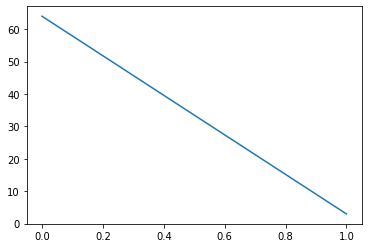

In [0]:
plt.plot(art_2['ndim_2_shape'][0])

In [0]:
art_2.count()

Out[180]: id              8219
name            8219
url             8219
image_url       8219
artist          8219
rating          3639
summary         5475
year             214
medium           436
location         514
name_english    8219
artist_name     8219
price           8219
price_name      8219
ndim            8219
dtype: int64

In [0]:
art_2_filt = art_2.loc[(art_2['ndim']==3)&(art_2['ndim_2_shape']==(64,3))]
art_2_filt.count()

Out[220]: id              8127
name            8127
url             8127
image_url       8127
artist          8127
rating          3619
summary         5423
year             211
medium           432
location         507
name_english    8127
artist_name     8127
price           8127
price_name      8127
ndim            8127
ndim_2          8127
ndim_2_shape    8127
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X = art_2_filt.loc[:,'url']
print(X.shape)
y = art_2_filt.loc[:,'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_test, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state = 42)

(8127,)


In [0]:
X_train.shape

Out[222]: (5688,)

In [0]:
X_test.shape

Out[223]: (2439,)

In [0]:
x_train = np.stack(X_train, axis = 0)
x_train.shape

Out[224]: (5688, 64, 64, 3)

In [0]:
X_test.shape

Out[225]: (2439,)

In [0]:
x_test = np.stack(X_test,axis=0)
x_test.shape

Out[226]: (2439, 64, 64, 3)

In [0]:
plt.imshow(x_train[0])
plt.axis("off")
plt.show()

In [0]:
## With autokeras does not yet work so ignore
### Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True, max_trials=5, metrics = ['mean_absolute_percentage_error'])
### Feed the image regressor with training data.
reg.fit(x_train, y_train, epochs=10)


Trial 5 Complete [00h 07m 06s]
val_loss: 5.111253261566162

Best val_loss So Far: 5.111253261566162
Total elapsed time: 00h 28m 28s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
113/178 [==================>...........] - ETA: 18s - loss: 37.7808 - mean_absolute_percentage_error: 31.3781

*** WARNING: max output size exceeded, skipping output. ***

178/178 [==============================] - 49s 275ms/step - loss: 4.8138 - mean_absolute_percentage_error: 16.2848
Epoch 8/10
  7/178 [>.............................] - ETA: 46s - loss: 4.8958 - mean_absolute_percentage_error: 16.9932

In [0]:
### Predict with the best model.
predicted_y = reg.predict(x_test)
print(predicted_y)
### Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

In [0]:
plt.imshow(x_train[0])
plt.axis("off")
plt.show()

In [0]:
model = reg.export_model()

In [0]:
model.summary()
model.save('model_reg_autokeras_logpricesclean_8000im_mape-'+ str(history.history['mean_absolute_percentage_error'][-1])'.h5')

In [0]:
part_x_test = x_test[:]
y_test_pred = reg.predict(part_x_test)
for i in range(len(y_test[:])):
    print((y_test[i]-y_test_pred[i][0])/y_test[i], y_test[i], y_test_pred[i])

1/1 [==============================] - 1s 1s/step
-2107.2608234295417 589.0 [1241765.6]
-0.6824109375 600000.0 [1009446.56]
0.6466714051079832 3356589.0 [1185978.9]
0.712818992675575 4363619.0 [1253148.5]
0.4290974488384956 1808000.0 [1032191.8]
-2.7710763120852606 338164.0 [1275242.2]
0.4693312361725664 1808000.0 [959449.1]
0.8434704472308049 3356589.0 [525405.4]
0.4371338372093023 2150000.0 [1210162.2]
-0.746389 1000000.0 [1746389.]
0.43641755392699116 1808000.0 [1018957.06]
-182.2866600790514 7590.0 [1391145.8]
0.7013629496582311 5392679.0 [1610453.8]
0.41950753595132745 1808000.0 [1049530.4]
0.32501949668141594 1808000.0 [1220364.8]
0.2730032142857143 1750000.0 [1272244.4]
0.31709383720930234 2150000.0 [1468248.2]
-1.5941555172413793 362500.0 [940381.4]
-15677.464583333332 120.0 [1881415.8]
-3.953166896551724 362500.0 [1795523.]
-1.5892405172413793 362500.0 [938599.7]
-29.60781 50000.0 [1530390.5]
-718.1539090909091 2750.0 [1977673.2]
-1.4136333962264152 662500.0 [1599032.1]
